### Disciplina de Cálculo Numérico

#### Curso: Engenharia da Computação

#### Discente: Raphaell Maciel de Sousa

#### Data: 19/04/2020

Objetivo: este programa calcula a raiz de uma equação pelo método de Iteração Linear.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
select = 1 # seleciona a função de teste

#f(x)
def f(x):
    #Domínio da função:
    #x>1/3
    return math.log(3*x-1)+2*x 

#primeira escolha da função phi
if select == 0:
    def functionPhi(x):
        return -math.log(3*x-1)/2.0

#segunda escolha da função phi
if select == 1:    
    def functionPhi(x):
        return (1/3)*math.exp(-2*x)+(1/3)

#### Fase 1: Isolameno da raiz em um intervalo

In [3]:
functionArray = []
xAxisArray = []

contSinal = 0

limInfX = 0.34
limSupX = 2
passoDeCalculo = 0.1

for x in np.arange(limInfX, limSupX, passoDeCalculo, dtype=float):    
    functionArray.append(f(x))
    xAxisArray.append(x)
    
    if f(limInfX) > 0:        
        if f(x) < 0 and contSinal == 0:
            a0 = x-passoDeCalculo
            b0 = x
            print "A raiz está entre o intervalo:"
            print "Limite Inferior:", a0
            print "Limite Superior", b0
            contSinal = 1
            
    else:        
        if f(x) > 0 and contSinal == 0:
            a0 = x-passoDeCalculo
            b0 = x
            print "A raiz está entre o intervalo:"
            print "Limite Inferior:", a0
            print "Limite Superior", b0
            contSinal = 1

A raiz está entre o intervalo:
Limite Inferior: 0.44000000000000006
Limite Superior 0.54


In [4]:
#https://docs.scipy.org/doc/scipy/reference/optimize.html

from scipy.optimize import fsolve

root = fsolve(f, 0.34)[0]
print "Raiz da equação via Scipy library:", root

Raiz da equação via Scipy library: 0.46488222063100815


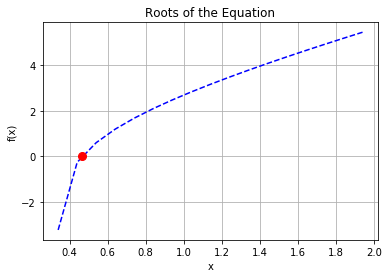

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(xAxisArray, functionArray, 'b--')
plt.plot([root], [0], marker='o', markersize=8, color="red")
ax.set_title("Roots of the Equation")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.grid(True)
plt.show()

### Fase 2: Refinamento das Raízes

#### Método Iterativo Linear

Consiste em transformar a função f(x) contínua no intervalo [a; b] em uma equação equivalente x=φ(x) e, a partir de uma aproximação inicial x0 (atribuída no intervalo de existência da raiz), gerar uma sequência de aproximações para a raiz pela relação xk+1=φ(xk)

A função φ(x) é denominada função de iteração. Normalmente, ocorrem mais de uma função de iteração, sendo que umas podem gerar sequências convergentes e outras podem gerar sequências divergentes.

#### 1. Cálculo do Ponto Médio

\begin{equation}
\bar{x} = \frac{a + b}{2}
\end{equation}

In [6]:
def xMedio(a, b):
    xMedio = (a + b)/2.0
    return xMedio

In [7]:
cont = 0
a = 0.42 #a0
b = 0.5 #b0

phiAnterior = 0
phi = 0.42 #functionPhi(xMedio(a,b))

functionResponse = f(phi)
stopSimulation = 0

erro = abs(phi-phiAnterior)

if functionPhi(xMedio(a,b)) == 0:
    print "A raiz da Equação é: ", xMedio(a, b)

else:
    while (abs(functionResponse)>0.01 and stopSimulation == 0 and erro>0.01):
      
        phi = functionPhi(phi)
        
        if phi<a or phi>b:
            stopSimulation = 1
            print "Sequência divergente!"
            print "phi_(k-1):", phiAnterior, ", phi_(k)", phi
            
        print phi
        
        erro = abs(phi-phiAnterior)
        phiAnterior = phi       
       
        cont = cont+1
        
if stopSimulation == 0:
    print "A raiz da equação pelo método da Iteração Linear é: ", phi
    print "Raiz obtida com ", cont, "iterações"

A raiz da Equação é:  0.46
A raiz da equação pelo método da Iteração Linear é:  0.42
Raiz obtida com  0 iterações


In [8]:
print functionPhi(0.42)

0.0


/home/raphaell/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


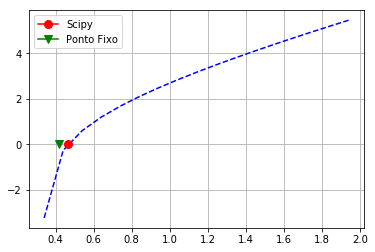

In [9]:
ax = fig.add_subplot(111)

plt.plot(xAxisArray, functionArray, 'b--')
plt.plot([root], [0], marker='o', markersize=8, color='red', label='Scipy')
plt.plot([phi], [0], marker='v', markersize=8, color='green', label='Ponto Fixo')

ax.set_title("Roots of the Equation")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

plt.grid(True)
plt.legend()